# Regresión logística ventas de vivienda

In [119]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [120]:
# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [121]:
# Cargar las funciones
exec(open(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\2. Ejercicio base datos vivienda\NuestrasFunciones.py').read())

In [122]:
# Leer datos depurados
viviendasDep = pd.read_csv(r'C:\Users\Usuario\Documents\CIENCIA DE DATOS\REPOSITORIO GITHUB\MINERÍA DE DATOS Y MODELACIÓN ejercicios\2. Ejercicio base datos vivienda\script_base_vivienda_reg_log\DatosViviendasDep_wins_itImp_moda.csv', index_col=0)

# Descriptivo de comprobación
viviendasDep.head()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat,price,Luxury
0,7.0,3.0,2.5,2070.0,13386.949854,1540.0,1980.0,47.5936,-122.013,3.0,9.182077,10.526316,2014,1.0,0,0,CD,1,0,3,653450,1
1,6.0,2.0,1.5,1640.0,12756.992143,1540.0,1916.0,47.6624,-122.325,2.0,9.042871,10.526316,2014,1.5,0,0,A,1,0,2,710000,1
2,10.0,4.0,3.5,3720.0,29172.702474,3720.0,2007.0,47.3216,-121.940,4.0,9.993406,10.526316,2014,1.0,0,1,B,0,0,4,780000,1
3,12.0,3.0,3.5,2260.0,15707.597076,1880.0,2003.0,47.6422,-122.361,3.0,8.386471,10.526316,2014,2.0,0,0,B,1,0,3,795000,1
4,10.0,3.0,2.0,2050.0,11165.954458,1170.0,1960.0,47.7447,-122.328,3.0,8.718566,10.526316,2014,1.0,0,0,A,1,0,3,399950,0


In [123]:
viviendasDep.yr_renovated.value_counts()
#from NuestrasFunciones import

yr_renovated
0    4784
1     216
Name: count, dtype: int64

In [124]:
# Descripción de los variables continuas
viviendasDep.describe()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings,year,floors,waterfront,view,basement,yr_renovated,price,Luxury
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,6.589400,3.506600,2.139500,2074.678000,1.486122e+04,1782.865800,1971.084200,47.561237,-122.213939,3.504746,8.979499,0.946316,2014.316800,1.496400,0.008400,0.098200,0.391200,0.043200,5.441291e+05,0.422800
std,3.120377,2.147855,0.867606,900.212366,3.741232e+04,813.746335,29.242444,0.138218,0.140419,2.133384,0.841595,2.933870,0.465275,0.541522,0.091275,0.297615,0.488068,0.203327,3.729869e+05,0.494054
min,1.000000,0.000000,0.000000,370.000000,6.380000e+02,370.000000,1900.000000,47.155900,-122.505000,0.000000,6.458338,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8.650000e+04,0.000000
25%,4.000000,3.000000,1.500000,1410.000000,5.240000e+03,1190.000000,1951.000000,47.475275,-122.330000,3.000000,8.544030,0.000000,2014.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.249375e+05,0.000000
50%,6.000000,3.000000,2.500000,1910.000000,7.948500e+03,1550.000000,1975.000000,47.574500,-122.226500,3.000000,8.943702,0.000000,2014.000000,1.500000,0.000000,0.000000,0.000000,0.000000,4.510000e+05,0.000000
75%,9.000000,4.000000,2.500000,2560.000000,1.155525e+04,2220.000000,1996.000000,47.678925,-122.124000,4.000000,9.280985,0.000000,2015.000000,2.000000,0.000000,0.000000,1.000000,0.000000,6.450000e+05,1.000000
max,12.000000,29.000000,6.000000,6550.000000,1.164794e+06,5400.000000,2015.000000,47.777000,-121.473000,28.825654,11.725695,15.789474,2015.000000,3.500000,1.000000,1.000000,1.000000,1.000000,7.062500e+06,1.000000


In [125]:
# Descripción de los variables categóricas
viviendasDep.describe(exclude=np.number)

,condition,bedrooms_cat
count,5000,5000
unique,4,7
top,B,3
freq,3254,2233


In [126]:
# Lista de columnas con menos de 10 valores distintos. Potenciales factores!
to_factor = list(viviendasDep.loc[:,viviendasDep.nunique() < 10]);  

# Cambiar el tipo de todas ellas a factor de una vez
viviendasDep[to_factor] = viviendasDep[to_factor].astype('category')

In [127]:
viviendasDep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   month          5000 non-null   float64 
 1   bedrooms       5000 non-null   float64 
 2   bathrooms      5000 non-null   float64 
 3   sqft_living    5000 non-null   float64 
 4   sqft_lot       5000 non-null   float64 
 5   sqft_above     5000 non-null   float64 
 6   yr_built       5000 non-null   float64 
 7   lat            5000 non-null   float64 
 8   long           5000 non-null   float64 
 9   bedrooms_cont  5000 non-null   float64 
 10  log_sqft_lot   5000 non-null   float64 
 11  prop_missings  5000 non-null   category
 12  year           5000 non-null   category
 13  floors         5000 non-null   category
 14  waterfront     5000 non-null   category
 15  view           5000 non-null   category
 16  condition      5000 non-null   category
 17  basement       5000 non-null   categor

In [128]:
viviendasDep.describe()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,price
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,6.589400,3.506600,2.139500,2074.678000,1.486122e+04,1782.865800,1971.084200,47.561237,-122.213939,3.504746,8.979499,5.441291e+05
std,3.120377,2.147855,0.867606,900.212366,3.741232e+04,813.746335,29.242444,0.138218,0.140419,2.133384,0.841595,3.729869e+05
min,1.000000,0.000000,0.000000,370.000000,6.380000e+02,370.000000,1900.000000,47.155900,-122.505000,0.000000,6.458338,8.650000e+04
25%,4.000000,3.000000,1.500000,1410.000000,5.240000e+03,1190.000000,1951.000000,47.475275,-122.330000,3.000000,8.544030,3.249375e+05
50%,6.000000,3.000000,2.500000,1910.000000,7.948500e+03,1550.000000,1975.000000,47.574500,-122.226500,3.000000,8.943702,4.510000e+05
75%,9.000000,4.000000,2.500000,2560.000000,1.155525e+04,2220.000000,1996.000000,47.678925,-122.124000,4.000000,9.280985,6.450000e+05
max,12.000000,29.000000,6.000000,6550.000000,1.164794e+06,5400.000000,2015.000000,47.777000,-121.473000,28.825654,11.725695,7.062500e+06


## Estudio descriptivo de relaciones con la respuesta

In [129]:
# Crear log_price
viviendasDep['log_price'] = np.log(viviendasDep.price)

**Variables de control**

In [130]:
# Crear las variables aleatorio y aleatorio2
viviendasDep['aleatorio'] = np.random.uniform(0,1,size=viviendasDep.shape[0])
viviendasDep['aleatorio2'] = np.random.uniform(0,1,size=viviendasDep.shape[0])
viviendasDep.head()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat,price,Luxury,log_price,aleatorio,aleatorio2
0,7.0,3.0,2.5,2070.0,13386.949854,1540.0,1980.0,47.5936,-122.013,3.0,9.182077,10.526316,2014,1.0,0,0,CD,1,0,3,653450,1,13.390021,0.459976,0.201222
1,6.0,2.0,1.5,1640.0,12756.992143,1540.0,1916.0,47.6624,-122.325,2.0,9.042871,10.526316,2014,1.5,0,0,A,1,0,2,710000,1,13.473020,0.941376,0.242749
2,10.0,4.0,3.5,3720.0,29172.702474,3720.0,2007.0,47.3216,-121.940,4.0,9.993406,10.526316,2014,1.0,0,1,B,0,0,4,780000,1,13.567049,0.700038,0.884915
3,12.0,3.0,3.5,2260.0,15707.597076,1880.0,2003.0,47.6422,-122.361,3.0,8.386471,10.526316,2014,2.0,0,0,B,1,0,3,795000,1,13.586097,0.749446,0.577555
4,10.0,3.0,2.0,2050.0,11165.954458,1170.0,1960.0,47.7447,-122.328,3.0,8.718566,10.526316,2014,1.0,0,0,A,1,0,3,399950,0,12.899095,0.980285,0.166284


In [131]:
# Reordenar categorías en bedrooms_cat
viviendasDep['bedrooms_cat']=viviendasDep.bedrooms_cat.cat.reorder_categories(['<2','2','3','4','5','6','>6'])

In [132]:
# En la variable categórica floor reemplazar la categoría 3.5 por 3.0 ya que es una sola observación 
viviendasDep['floors'] = viviendasDep['floors'].replace({3.5: 3.0})

**Función para obetener un reporte descriptivo del archivo completo** que evalúa a nivel univariante y bivariante las variables. También da información sobre valores extremos y missings, por lo que se podría utilizar en etapa de depuración

In [133]:
# Sacar la variable objetivo binaria y en las imput también sacar price y log_price
varObjBin = viviendasDep.Luxury
imputDep = viviendasDep.drop(['price','log_price','Luxury'],axis=1)
varObjBin.info()

<class 'pandas.core.series.Series'>
Index: 5000 entries, 0 to 4999
Series name: Luxury
Non-Null Count  Dtype   
--------------  -----   
5000 non-null   category
dtypes: category(1)
memory usage: 44.1 KB


Definir algunas funciones que faciliten el proceso de búsqueda, automatizando lo más posible para que luego sea aplicar y evaluar

In [134]:
# Generar función cremers_v para ver asociación de variables
# Aplicar la función al input completo contra la objetivo (varObjBin)
tablaCramer = pd.DataFrame(imputDep.apply(lambda x: cramers_v(x,varObjBin)),columns=['VCramer'])
tablaCramer

,VCramer
month,0.041990
bedrooms,0.076802
bathrooms,0.374203
sqft_living,0.524102
sqft_lot,0.046442
sqft_above,0.454317
yr_built,0.157849
lat,0.471828
long,0.084156
bedrooms_cont,0.076802


In [135]:
# plt.clf()
# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
px.bar(tablaCramer,x=tablaCramer.VCramer,title='Relaciones frente al Luxury',height=600).update_yaxes(categoryorder="total ascending")
# plt.show()

In [136]:
# Pintar las relaciones de las variables con la objetivo binaria
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

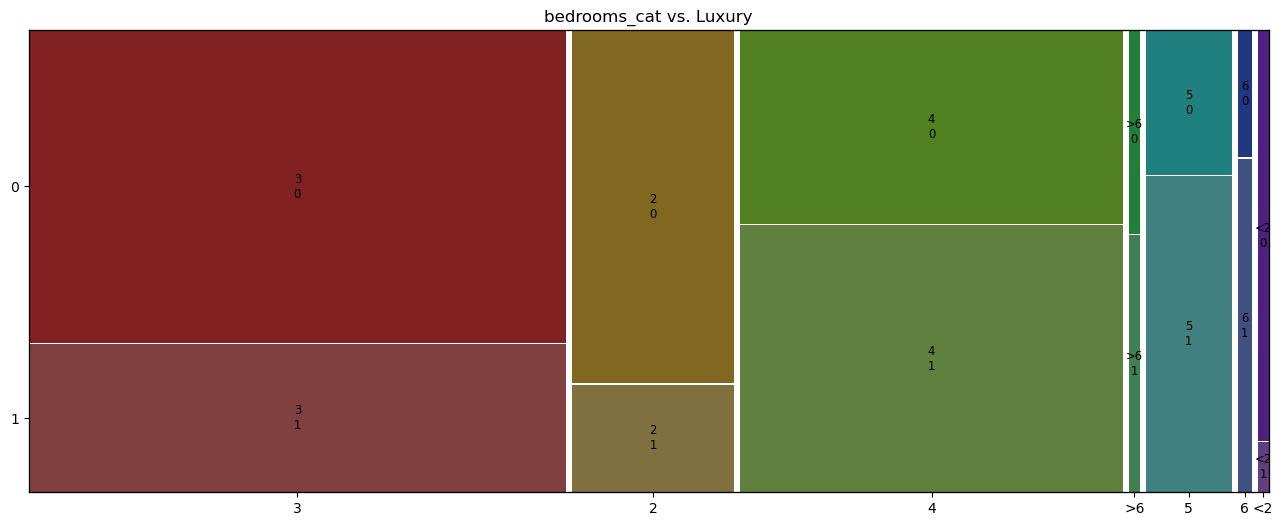

In [137]:
# Crear un objeto de figura y ejes personalizados
fig, ax = plt.subplots(figsize=(16, 6))  # Tamaño personalizado
# Crear la gráfica de mosaico en los ejes personalizados
mosaic(viviendasDep, ['bedrooms_cat', 'Luxury'], gap=0.005, title='bedrooms_cat vs. Luxury', ax=ax)
# Mostrar la gráfica
plt.show()

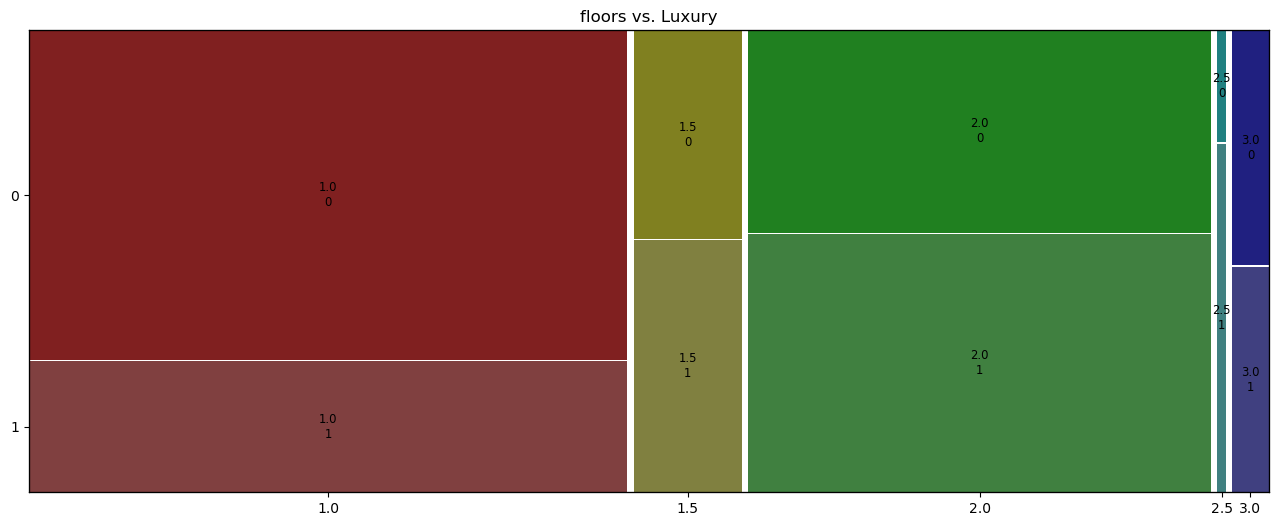

In [138]:
# Crear un objeto de figura y ejes personalizados
fig, ax = plt.subplots(figsize=(16, 6))  # Tamaño personalizado
# Crear la gráfica de mosaico en los ejes personalizados
mosaic(viviendasDep, ['floors', 'Luxury'], gap=0.005, title='floors vs. Luxury', ax=ax)
# Mostrar la gráfica
plt.show()

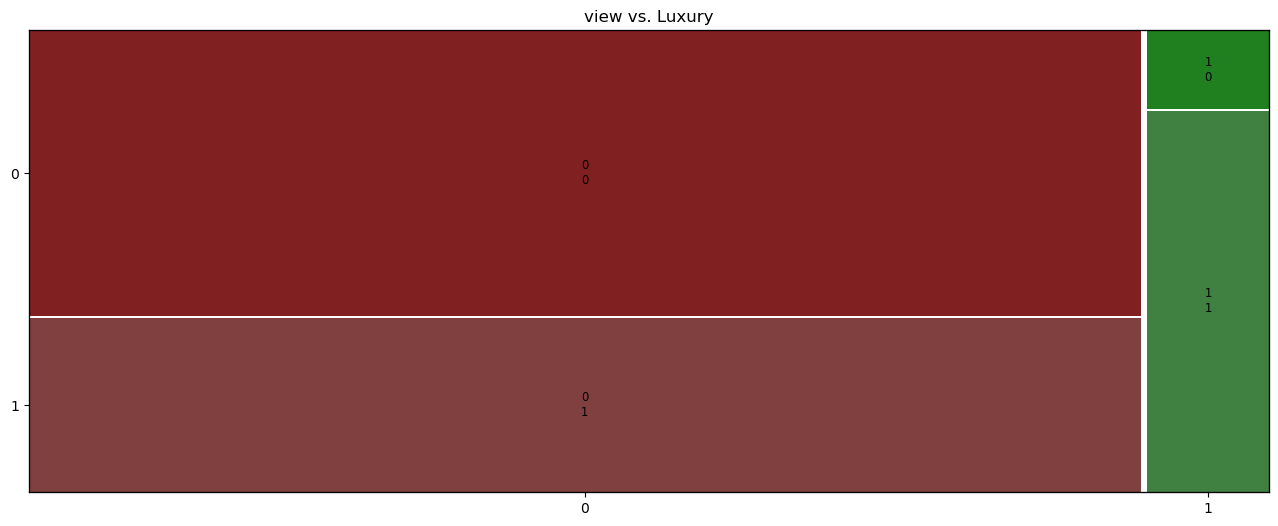

In [139]:
# Crear un objeto de figura y ejes personalizados
fig, ax = plt.subplots(figsize=(16, 6))  # Tamaño personalizado
# Crear la gráfica de mosaico en los ejes personalizados
mosaic(viviendasDep, ['view', 'Luxury'], gap=0.005, title='view vs. Luxury', ax=ax)
# Mostrar la gráfica
plt.show()

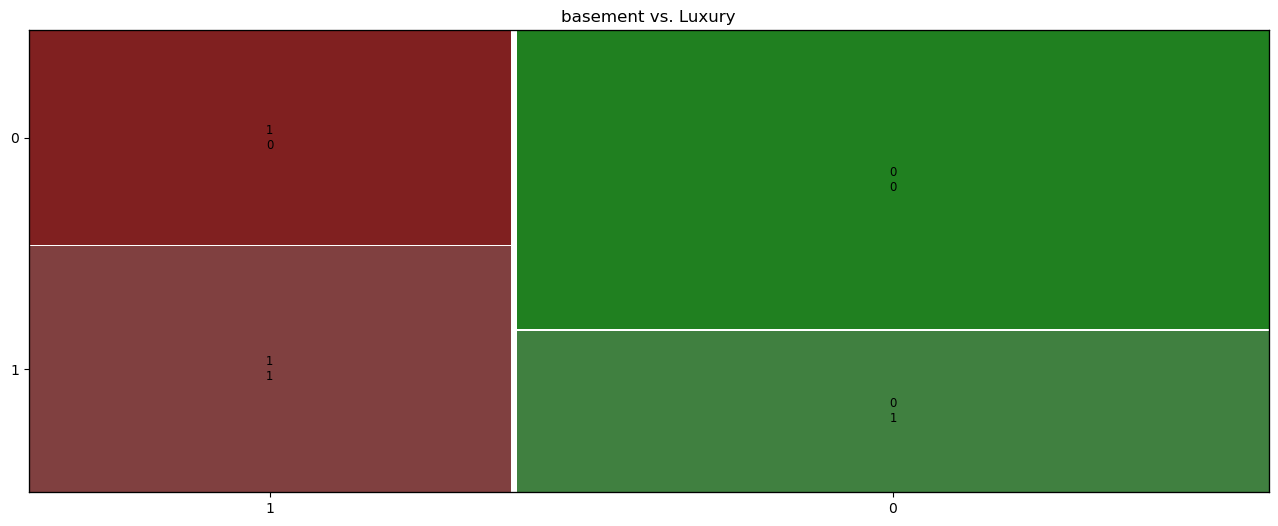

In [140]:
# Crear un objeto de figura y ejes personalizados
fig, ax = plt.subplots(figsize=(16, 6))  # Tamaño personalizado
# Crear la gráfica de mosaico en los ejes personalizados
mosaic(viviendasDep, ['basement', 'Luxury'], gap=0.005, title='basement vs. Luxury', ax=ax)
# Mostrar la gráfica
plt.show()

In [141]:
# Matriz de correlaciones 
corr = viviendasDep.select_dtypes(include=np.number).corr()
corr.style.background_gradient(cmap='coolwarm').format(precision=3)
#sns.heatmap(corr, annot=True)

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,price,log_price,aleatorio,aleatorio2
month,1.000,0.011,0.032,0.024,-0.000,0.018,0.011,0.019,-0.015,0.011,-0.001,-0.015,-0.016,0.050,-0.007
bedrooms,0.011,1.000,0.205,0.263,0.002,0.226,0.103,-0.009,0.052,1.000,0.072,0.137,0.151,0.009,-0.007
bathrooms,0.032,0.205,1.000,0.684,0.068,0.613,0.441,0.045,0.187,0.205,0.093,0.488,0.524,0.051,-0.013
sqft_living,0.024,0.263,0.684,1.000,0.155,0.876,0.311,0.063,0.229,0.264,0.343,0.696,0.707,0.050,-0.003
sqft_lot,-0.000,0.002,0.068,0.155,1.000,0.168,0.049,-0.076,0.228,0.002,0.576,0.084,0.090,0.008,-0.038
sqft_above,0.018,0.226,0.613,0.876,0.168,1.000,0.419,-0.001,0.333,0.227,0.328,0.599,0.604,0.045,0.000
yr_built,0.011,0.103,0.441,0.311,0.049,0.419,1.000,-0.154,0.396,0.104,-0.025,0.056,0.077,0.032,0.009
lat,0.019,-0.009,0.045,0.063,-0.076,-0.001,-0.154,1.000,-0.149,-0.010,-0.158,0.301,0.442,-0.006,0.013
long,-0.015,0.052,0.187,0.229,0.228,0.333,0.396,-0.149,1.000,0.053,0.371,0.011,0.034,0.028,-0.017
bedrooms_cont,0.011,1.000,0.205,0.264,0.002,0.227,0.104,-0.010,0.053,1.000,0.073,0.137,0.151,0.008,-0.007


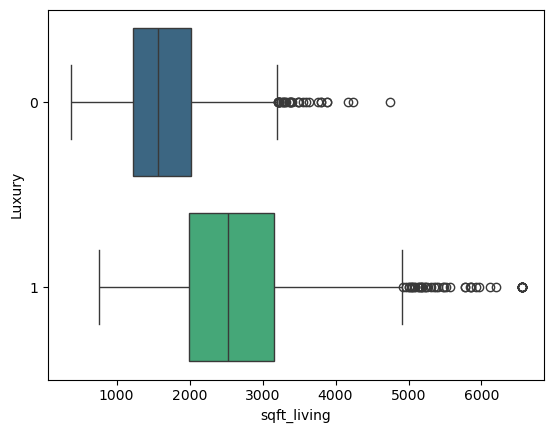

In [142]:
# Gráfico para ver relación entre sqft_living y Luxury
plt.clf()
sns.boxplot(x='sqft_living',y='Luxury',data=viviendasDep,palette='viridis')
plt.show()

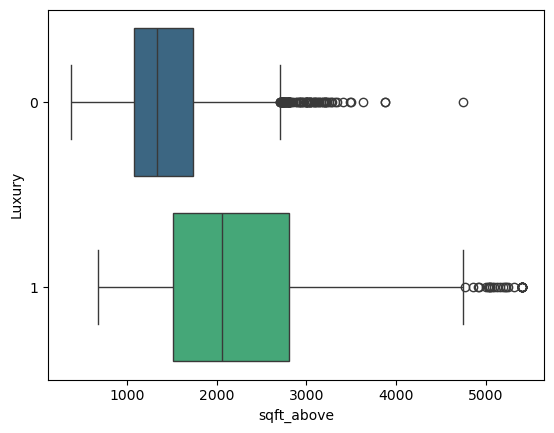

In [143]:
plt.clf()
sns.boxplot(x='sqft_above',y='Luxury',hue='Luxury',data=viviendasDep,palette='viridis',legend=False)
plt.show()

<Figure size 640x480 with 0 Axes>

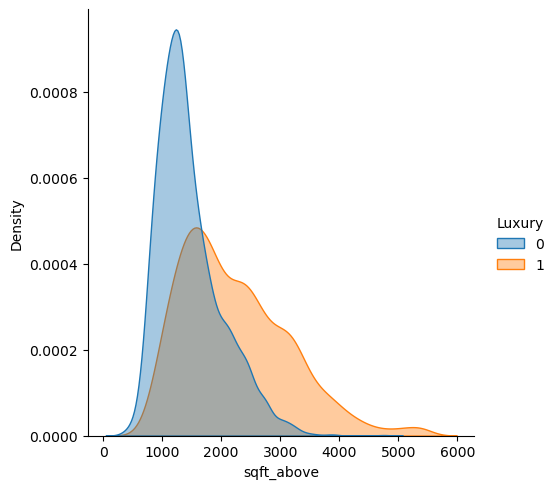

In [144]:
plt.clf()
#sns.kdeplot(vinosDep,x="CalifProductor", hue="Compra", fill=True, common_norm=False, alpha=0.4)
sns.displot(viviendasDep, x="sqft_above", hue="Luxury",kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='CalifProductor',color='Compra',data=vinosDep,palette='viridis')
plt.show()

<Figure size 640x480 with 0 Axes>

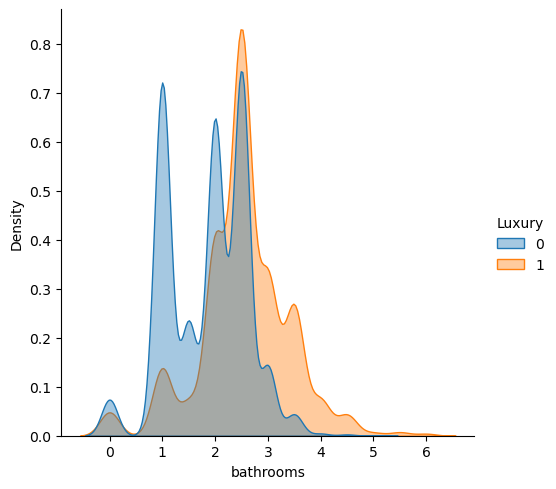

In [145]:
plt.clf()
#sns.kdeplot(vinosDep,x="Acidez", hue="Compra", fill=True, common_norm=False, alpha=0.4)
sns.displot(viviendasDep, x="bathrooms", hue="Luxury", kind="kde",fill=True, common_norm=False, alpha=0.4)
#sns.histplot(y='CalifProductor',color='Compra',data=vinosDep,palette='viridis')
plt.show()

## Tranformaciones de variables

In [146]:
## Función mejor tranformación ##
from sklearn.preprocessing import scale

In [147]:
# Aplicar a las variables continuas la mejor transfromación según cramer frente a varObjBin
transf_cramer = imputDep.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,varObjBin, tipo='cramer'))
transf_cramer_names = imputDep.select_dtypes(include=np.number).apply(lambda x: mejorTransf(x,varObjBin,tipo='cramer', name=True))
transf_cramer.columns = transf_cramer_names.values
transf_cramer.head()

,month_raiz4,bedrooms_raiz4,bathrooms_ident,sqft_living_ident,sqft_lot_log,sqft_above_ident,yr_built_ident,lat_sqr,long_log,bedrooms_cont_raiz4,log_sqft_lot_ident,aleatorio_cuarta,aleatorio2_exp
0,1.177613,1.087171,2.881880,1.888732,-1.076158,1.438038,2.736123,10.030913,1.253975,1.089009,3.236823,6.273316,2.006712
1,1.125145,0.982378,1.729168,1.411019,-1.126818,1.438038,0.547305,13.432058,0.248503,0.984040,3.071400,110.130232,2.317110
2,1.303237,1.168236,4.034592,3.721816,-0.270648,4.117274,3.659531,1.437730,1.392319,1.170212,4.200957,33.669988,21.421419
3,1.370283,1.087171,4.034592,2.099815,-0.908973,1.855901,3.522730,12.382068,0.025379,1.089009,2.291374,44.232741,7.388202
4,1.303237,1.087171,2.305524,1.866513,-1.267511,0.983306,2.052117,18.151643,0.231697,1.089009,2.686015,129.501459,1.778006


In [148]:
# Generar input con transformaciones
imput_transf = imputDep.join(transf_cramer)

# Aplicar la función al input completo contra la variable objetivo
tablaCramer = pd.DataFrame(imput_transf.apply(lambda x: cramers_v(x, varObjBin)), columns=['VCramer'])

# Obtener el gráfico de importancia de las variables frente a la objetivo continua según vcramer
import plotly.express as px
fig = px.bar(tablaCramer, x=tablaCramer.VCramer, title='Relaciones frente a Luxury')

# Ajustar la altura de la imagen
fig.update_yaxes(categoryorder="total ascending")
fig.update_layout(height=800)  # Cambia el valor de 800 a la altura deseada

# Mostrar el gráfico
fig.show()


In [149]:
# Guardar archivo con transformaciones para la variable objetivo binaria
# Agregar variables objetivo al input ya limpio
todo_bin = pd.concat([imput_transf,varObjBin], axis=1)

# Guardar archivo
todo_bin.to_csv('todo_bin_Vivienda.csv')

## Modelos de regresión logística para la predicción de la variable Luxury

In [150]:
# Se trabaja con el archivo con variable originales
viviendasDep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   month          5000 non-null   float64 
 1   bedrooms       5000 non-null   float64 
 2   bathrooms      5000 non-null   float64 
 3   sqft_living    5000 non-null   float64 
 4   sqft_lot       5000 non-null   float64 
 5   sqft_above     5000 non-null   float64 
 6   yr_built       5000 non-null   float64 
 7   lat            5000 non-null   float64 
 8   long           5000 non-null   float64 
 9   bedrooms_cont  5000 non-null   float64 
 10  log_sqft_lot   5000 non-null   float64 
 11  prop_missings  5000 non-null   category
 12  year           5000 non-null   category
 13  floors         5000 non-null   category
 14  waterfront     5000 non-null   category
 15  view           5000 non-null   category
 16  condition      5000 non-null   category
 17  basement       5000 non-null   categor

In [151]:
# Tabla de frecuencias relativas de las categorías de Compra
viviendasDep.Luxury.value_counts(normalize=True)

Luxury
0    0.5772
1    0.4228
Name: proportion, dtype: float64

### Partición training-test

In [152]:
# Función necesaria
from sklearn.model_selection import train_test_split

# Crear 4 objetos: predictores para tr y tst y variable objetivo para tr y tst. 
X_train, X_test, y_train, y_test = train_test_split(imputDep, varObjBin, test_size=0.2, random_state=1234)

# Comprobar dimensiones
print('Training dataset shape:', X_train.shape, y_train.shape)
print('Testing dataset shape:', X_test.shape, y_test.shape)

Training dataset shape: (4000, 22) (4000,)
Testing dataset shape: (1000, 22) (1000,)


In [153]:
# ¿ Mantendrá la proporción de clases de la variable objetivo esta partición?
# Training 
print(y_train.value_counts(normalize=True))

# Test
y_test.value_counts(normalize=True)

Luxury
0    0.57475
1    0.42525
Name: proportion, dtype: float64


Luxury
0    0.587
1    0.413
Name: proportion, dtype: float64

## Modelo completo de referencia

In [154]:
from patsy import dmatrices
import pandas as pd

In [155]:
# Generar el training con la objetivo dentro (método logit de *statmodels.formula.api* no acepta categórica como objetivo, por lo que se transforma en entera int64)
data_train = X_train.join(y_train.astype('int64'))
data_test = X_test.join(y_test.astype('int64'))

In [156]:
# Aplicar a fórmula de modelo completo
formC=ols_formula(data_train,'Luxury')
formC

'Luxury ~ month + bedrooms + bathrooms + sqft_living + sqft_lot + sqft_above + yr_built + lat + long + bedrooms_cont + log_sqft_lot + prop_missings + year + floors + waterfront + view + condition + basement + yr_renovated + bedrooms_cat + aleatorio + aleatorio2'

In [157]:
data_train.head()

,month,bedrooms,bathrooms,sqft_living,sqft_lot,sqft_above,yr_built,lat,long,bedrooms_cont,log_sqft_lot,prop_missings,year,floors,waterfront,view,condition,basement,yr_renovated,bedrooms_cat,aleatorio,aleatorio2,Luxury
3700,2.0,3.0,1.0,1190.0,8450.0,1190.0,1961.0,47.4807,-122.157,3.0,9.041922,0.0,2015,1.0,0,0,A,0,0,3,0.759568,0.521780,0
894,7.0,4.0,2.5,3290.0,8147.0,3290.0,2003.0,47.7048,-122.107,4.0,9.005405,0.0,2014,2.0,0,0,B,0,0,4,0.190210,0.741718,1
2322,6.0,4.0,3.0,2500.0,4950.0,2500.0,2010.0,47.6964,-122.017,4.0,8.507143,0.0,2014,2.0,0,0,B,0,0,4,0.682764,0.958124,1
4592,5.0,3.0,2.0,1090.0,6090.0,940.0,1940.0,47.5118,-122.259,3.0,8.714403,0.0,2015,1.0,0,0,B,1,0,3,0.114092,0.739070,0
3711,2.0,3.0,1.0,880.0,8976.0,880.0,1966.0,47.3056,-122.368,3.0,9.102310,0.0,2015,1.0,0,0,CD,0,0,3,0.607154,0.819894,0


In [158]:
# Importar la api para fórmulas (en concreto logit para regresión)
from statsmodels.formula.api import logit 

# Ajustar regresión de ejemplo
modeloCompleto = logit(formC,data=data_train).fit()
modeloCompleto.summary()

Optimization terminated successfully.
         Current function value: 0.372084
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3965
Method:                           MLE   Df Model:                           34
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4544
Time:                        19:02:34   Log-Likelihood:                -1488.3
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                            -235.4253     58.080     -4.053      0.000    -349.259    -121.591
prop_missings[T.5.263157894736842]      0.1719      0.350      0.491      0.624      -0.515       0.858
prop_missings[T.10.526315789473683]     0.0658      0.173      0.380      0.704      -0.274       0.405
prop_missings[T.15.789473684210526]     0.9913      0.836      1.186      0.236      -0.647       2.630
year[T.2015]                            0.3289      0.157      2.100      0.036       0.022       0.636
floors[T.1.5]                           0.4391      0.179      2.457      0.014       0.089       0.789
floors[T.2.0]                           0.0619      0.161      0.385      0.700      -0.253       0.376
floors[T.2.5]                           0.9930      0.601      1.653      0.098      -0.184       2.170
floors[T.3.0]                           1.2994      0.311      4.179      0.000       0.690       1.909
waterfront[T.1]                         2.3455      0.901      2.604      0.009       0.580       4.111
view[T.1]                               1.5269      0.193      7.907      0.000       1.148       1.905
condition[T.B]                         -0.3630      0.183     -1.978      0.048      -0.723      -0.003
condition[T.CD]                        -0.1516      0.184     -0.825      0.409      -0.512       0.209
condition[T.Desc]                      -0.8826      0.656     -1.345      0.179      -2.169       0.404
basement[T.1]                           0.7937      0.192      4.129      0.000       0.417       1.170
yr_renovated[T.1]                       0.0117      0.268      0.044      0.965      -0.513       0.536
bedrooms_cat[T.2]                       0.0683      0.653      0.105      0.917      -1.212       1.348
bedrooms_cat[T.3]                      -0.4430      0.677     -0.655      0.513      -1.769       0.883
bedrooms_cat[T.4]                      -0.6826      0.726     -0.940      0.347      -2.106       0.741
bedrooms_cat[T.5]                      -1.1217      0.804     -1.396      0.163      -2.697       0.454
bedrooms_cat[T.6]                      -1.5604      0.983     -1.587      0.113      -3.488       0.367
bedrooms_cat[T.>6]                     -1.5542      2.249     -0.691      0.490      -5.962       2.854
month                                  -0.0014      0.024     -0.059      0.953      -0.048       0.045
bedrooms                                0.2969      9.384      0.032      0.975     -18.096      18.690
bathrooms                               0.3768      0.088      4.276      0.000       0.204       0.549
sqft_living                             0.0013      0.000      5.581      0.000       0.001       0.002
sqft_lot                             5.042e-06   1.78e-06      2.835      0.005    1.56e-06    8.53e-06
sqft_above                              0.0016      0.000      6.079      0.000       0.001       0.002
yr_built         

In [159]:
# Ver la distribución de la tabla cruzada de view y la objetivo Luxury en data_train
pd.crosstab(data_train.Luxury, data_train.view)

view,0,1
Luxury,,
0,2231,68
1,1382,319


In [160]:
pd.crosstab(data_train.Luxury, data_train.bedrooms_cat)

bedrooms_cat,<2,2,3,4,5,6,>6
Luxury,,,,,,,
0,35,416,1201,534,87,11,15
1,4,122,580,732,204,38,21


In [161]:
pd.crosstab(data_train.Luxury, data_train.basement)

basement,0,1
Luxury,,
0,1583,716
1,850,851


## Importancia de las variables

In [162]:
import statsmodels.api as sm
import patsy

# Generar las matrices de diseño según la fórmula de modelo completo
y_tr, X_tr = patsy.dmatrices(formC, data_train, return_type='dataframe')

# Generar las matrices de diseño según la fórmula de modelo completo para test
y_tst, X_tst = patsy.dmatrices(formC, data_test, return_type='dataframe')

# Ahora se puede aplicar la función "oficial" de statmodels Logit (con formato y,X)
# model=sm.Logit(y_tr,X_tr).fit()
# model.summary()

In [163]:
# Calcular la importancia relativa de los efectos del modelo
from relativeImp import relativeImp

# Nombres de predictores (en modo dummy) donde quitamos la constante
names=X_tr.columns.tolist()[1:]

# Calcular importancia relativa
df_results = relativeImp(X_tr.join(y_tr), outcomeName = 'Luxury', driverNames = names)

# Ordenar valores 
df_results.sort_values(by='normRelaImpt', ascending=False)

,driver,rawRelaImpt,normRelaImpt
28,lat,0.097397,21.830603
24,sqft_living,0.086260,19.334361
26,sqft_above,0.074913,16.790962
23,bathrooms,0.041142,9.221609
9,view[T.1],0.030238,6.777622
13,basement[T.1],0.020279,4.545347
5,floors[T.2.0],0.016780,3.761010
27,yr_built,0.009798,2.196131
17,bedrooms_cat[T.4],0.008800,1.972440
15,bedrooms_cat[T.2],0.007306,1.637581


## Métricas de ajuste en training-test

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Definición de modelo
modelo = LogisticRegression(solver='lbfgs', max_iter=1000, penalty=None)

# Arreglar y para que le guste a sklearn...numeric
y_tr_ = y_tr.Luxury.ravel()

# Ajuste de modelo
modelLog = modelo.fit(X_tr,y_tr_)

# Accuracy del modelo en training
acc = modelLog.score(X_tr,y_tr_)
print(acc)

# Predicciones en test
y_pred = modelLog.predict(X_tst)

# Matriz de confusion de clasificación 
print(metrics.confusion_matrix(y_tst,y_pred))

# Reporte de clasificación 
print(metrics.classification_report(y_tst,y_pred))

# Extraer el Area bajo la curva ROC
metrics.roc_auc_score(y_tr, modelLog.predict_proba(X_tr)[:, 1])

0.816
[[512  75]
 [117 296]]
              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       587
         1.0       0.80      0.72      0.76       413

    accuracy                           0.81      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.81      0.81      0.81      1000



0.8921298246125466

In [165]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from bioinfokit.visuz import stat

fpr, tpr, thresholds = roc_curve(y_tr, modelLog.predict_proba(X_tr)[:, 1])
auc = roc_auc_score(y_tr, modelLog.predict_proba(X_tr)[:, 1])

# plot ROC
plt.clf()
stat.roc(fpr=fpr, tpr=tpr, auc=auc, shade_auc=True, per_class=True, legendpos='upper center', legendanchor=(0.5, 1.08), legendcols=3)
plt.show()

<Figure size 640x480 with 0 Axes>

In [166]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Calcular las tasas de verdaderos positivos y falsos positivos
fpr, tpr, thresholds = roc_curve(y_tr_, modelLog.predict_proba(X_tr)[:, 1])
roc_auc = auc(fpr, tpr)

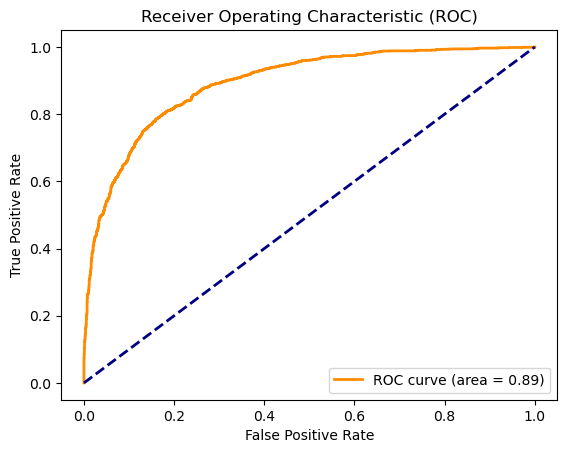

In [167]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

## Proceso manual hacia delante

In [168]:
# Se considera un modelo con las 3 primeras variables ya que presentan una importancia bastante más elevada que el resto
form1 = 'Luxury ~ lat + sqft_living + sqft_above'

# Ajustar modelo 1
modelo1 = logit(form1,data=data_train).fit()
modelo1.summary()

Optimization terminated successfully.
         Current function value: 0.419594
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3996
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.3847
Time:                        19:05:37   Log-Likelihood:                -1678.4
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -393.5682     18.116    -21.725      0.000    -429.075    -358.061
lat             8.1706      0.379     21.535      0.000       7.427       8.914
sqft_living     0.0021      0.000     18.474      0.000       0.002       0.002
sqft_above      0.0002      0.000      1.559      0.119   -4.53e-05       0.000
===============================================================================
"""

In [169]:
# Agregar variable bathrooms
form2 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms'

# Ajustar modelo 2
modelo2 = logit(form2,data=data_train).fit()
modelo2.summary()

Optimization terminated successfully.
         Current function value: 0.419290
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3995
Method:                           MLE   Df Model:                            4
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.3851
Time:                        19:05:47   Log-Likelihood:                -1677.2
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -393.5918     18.114    -21.728      0.000    -429.095    -358.088
lat             8.1692      0.379     21.535      0.000       7.426       8.913
sqft_living     0.0020      0.000     17.018      0.000       0.002       0.002
sqft_above      0.0002      0.000      1.440      0.150   -5.87e-05       0.000
bathrooms       0.1098      0.070      1.560      0.119      -0.028       0.248
===============================================================================
"""

In [170]:
# Agregar variable view
form3 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view'

# Ajustar modelo 3
modelo3 = logit(form3,data=data_train).fit()
modelo3.summary()

Optimization terminated successfully.
         Current function value: 0.404359
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3994
Method:                           MLE   Df Model:                            5
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4070
Time:                        19:05:56   Log-Likelihood:                -1617.4
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -411.3855     18.733    -21.961      0.000    -448.101    -374.670
view[T.1]       1.8265      0.180     10.161      0.000       1.474       2.179
lat             8.5421      0.392     21.776      0.000       7.773       9.311
sqft_living     0.0018      0.000     14.743      0.000       0.002       0.002
sqft_above      0.0004      0.000      3.207      0.001       0.000       0.001
bathrooms       0.0913      0.071      1.278      0.201      -0.049       0.231
===============================================================================
"""

In [171]:
# Agregar variable basement
form4 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement'

# Ajustar modelo 4
modelo4 = logit(form4,data=data_train).fit()
modelo4.summary()

Optimization terminated successfully.
         Current function value: 0.402188
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3993
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4102
Time:                        19:06:06   Log-Likelihood:                -1608.8
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -410.1192     18.846    -21.762      0.000    -447.057    -373.182
view[T.1]         1.7995      0.179     10.026      0.000       1.448       2.151
basement[T.1]     0.7311      0.174      4.192      0.000       0.389       1.073
lat               8.5103      0.395     21.564      0.000       7.737       9.284
sqft_living       0.0011      0.000      5.629      0.000       0.001       0.002
sqft_above        0.0012      0.000      5.270      0.000       0.001       0.002
bathrooms         0.0559      0.072      0.777      0.437      -0.085       0.197
=================================================================================
"""

In [172]:
form5 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors'

# Ajustar modelo 5
modelo5 = logit(form5,data=data_train).fit()
modelo5.summary()

Optimization terminated successfully.
         Current function value: 0.393387
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3989
Method:                           MLE   Df Model:                           10
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4231
Time:                        19:06:26   Log-Likelihood:                -1573.5
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -404.8593     19.116    -21.179      0.000    -442.326    -367.392
view[T.1]         1.7942      0.182      9.842      0.000       1.437       2.151
basement[T.1]     0.7506      0.181      4.155      0.000       0.397       1.105
floors[T.1.5]     1.0953      0.153      7.147      0.000       0.795       1.396
floors[T.2.0]    -0.0365      0.135     -0.270      0.787      -0.302       0.229
floors[T.2.5]     0.9771      0.557      1.753      0.080      -0.115       2.070
floors[T.3.0]     0.7925      0.237      3.349      0.001       0.329       1.256
lat               8.3919      0.400     20.961      0.000       7.607       9.177
sqft_living       0.0012      0.000      5.638      0.000       0.001       0.002
sqft_above        0.0012      0.000      4.664      0.000       0.001       0.002
bathrooms         0.0982      0.078      1.258      0.209      -0.055       0.251
=================================================================================
"""

In [173]:
form6 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat'

# Ajustar modelo 6
modelo6 = logit(form6,data=data_train).fit()
modelo6.summary()

Optimization terminated successfully.
         Current function value: 0.390574
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3983
Method:                           MLE   Df Model:                           16
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4273
Time:                        19:07:16   Log-Likelihood:                -1562.3
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -408.9371     19.398    -21.081      0.000    -446.957    -370.917
view[T.1]              1.7407      0.183      9.498      0.000       1.382       2.100
basement[T.1]          0.7251      0.182      3.992      0.000       0.369       1.081
floors[T.1.5]          1.1411      0.155      7.350      0.000       0.837       1.445
floors[T.2.0]         -0.0908      0.137     -0.665      0.506      -0.358       0.177
floors[T.2.5]          0.9131      0.549      1.664      0.096      -0.162       1.988
floors[T.3.0]          0.7438      0.237      3.132      0.002       0.278       1.209
bedrooms_cat[T.2]      0.1401      0.630      0.222      0.824      -1.094       1.375
bedrooms_cat[T.3]     -0.4197      0.624     -0.673      0.501      -1.642       0.802
bedrooms_cat[T.4]     -0.5482      0.629     -0.872      0.383      -1.780       0.684
bedrooms_cat[T.5]     -0.8599      0.651     -1.321      0.186      -2.136       0.416
bedrooms_cat[T.6]     -1.2690      0.770     -1.649      0.099      -2.778       0.240
bedrooms_cat[T.>6]    -0.2288      0.839     -0.273      0.785      -1.874       1.416
lat                    8.4760      0.406     20.860      0.000       7.680       9.272
sqft_living            0.0014      0.000      6.347      0.000       0.001       0.002
sqft_above             0.0011      0.000      4.467      0.000       0.001       0.002
bathrooms              0.1707      0.080      2.123      0.034       0.013       0.328
======================================================================================
"""

In [174]:
form7 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built'

# Ajustar modelo 7
modelo7 = logit(form7,data=data_train).fit()
modelo7.summary()

Optimization terminated successfully.
         Current function value: 0.378135
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3982
Method:                           MLE   Df Model:                           17
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4455
Time:                        19:07:41   Log-Likelihood:                -1512.5
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -346.3940     20.462    -16.929      0.000    -386.498    -306.290
view[T.1]              1.5974      0.187      8.556      0.000       1.231       1.963
basement[T.1]          0.7812      0.186      4.189      0.000       0.416       1.147
floors[T.1.5]          0.5349      0.171      3.120      0.002       0.199       0.871
floors[T.2.0]          0.2342      0.146      1.602      0.109      -0.052       0.521
floors[T.2.5]          1.1619      0.582      1.997      0.046       0.021       2.303
floors[T.3.0]          1.6422      0.264      6.229      0.000       1.126       2.159
bedrooms_cat[T.2]      0.3462      0.642      0.539      0.590      -0.912       1.605
bedrooms_cat[T.3]     -0.1576      0.636     -0.248      0.804      -1.405       1.090
bedrooms_cat[T.4]     -0.3410      0.641     -0.532      0.595      -1.598       0.916
bedrooms_cat[T.5]     -0.7061      0.663     -1.065      0.287      -2.006       0.594
bedrooms_cat[T.6]     -1.2647      0.796     -1.588      0.112      -2.826       0.296
bedrooms_cat[T.>6]     0.3389      0.848      0.400      0.689      -1.323       2.001
lat                    8.0770      0.415     19.460      0.000       7.263       8.890
sqft_living            0.0013      0.000      5.724      0.000       0.001       0.002
sqft_above             0.0015      0.000      5.599      0.000       0.001       0.002
bathrooms              0.4001      0.086      4.656      0.000       0.232       0.569
yr_built              -0.0227      0.002     -9.581      0.000      -0.027      -0.018
======================================================================================
"""

In [175]:
form8 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built + log_sqft_lot'

# Ajustar modelo 8
modelo8 = logit(form8,data=data_train).fit()
modelo8.summary()

Optimization terminated successfully.
         Current function value: 0.377808
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3981
Method:                           MLE   Df Model:                           18
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4460
Time:                        19:07:48   Log-Likelihood:                -1511.2
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -343.1505     20.569    -16.683      0.000    -383.464    -302.837
view[T.1]              1.6205      0.188      8.618      0.000       1.252       1.989
basement[T.1]          0.7437      0.188      3.959      0.000       0.375       1.112
floors[T.1.5]          0.4913      0.174      2.823      0.005       0.150       0.832
floors[T.2.0]          0.1452      0.156      0.930      0.352      -0.161       0.451
floors[T.2.5]          1.0871      0.589      1.844      0.065      -0.068       2.242
floors[T.3.0]          1.4286      0.294      4.853      0.000       0.852       2.006
bedrooms_cat[T.2]      0.3224      0.643      0.501      0.616      -0.939       1.583
bedrooms_cat[T.3]     -0.1627      0.638     -0.255      0.799      -1.412       1.087
bedrooms_cat[T.4]     -0.3515      0.643     -0.547      0.584      -1.611       0.908
bedrooms_cat[T.5]     -0.7415      0.665     -1.115      0.265      -2.044       0.561
bedrooms_cat[T.6]     -1.2944      0.798     -1.622      0.105      -2.858       0.270
bedrooms_cat[T.>6]     0.3128      0.851      0.368      0.713      -1.355       1.980
lat                    8.0310      0.416     19.294      0.000       7.215       8.847
sqft_living            0.0013      0.000      5.870      0.000       0.001       0.002
sqft_above             0.0015      0.000      5.692      0.000       0.001       0.002
bathrooms              0.3943      0.086      4.575      0.000       0.225       0.563
yr_built              -0.0227      0.002     -9.600      0.000      -0.027      -0.018
log_sqft_lot          -0.1138      0.070     -1.615      0.106      -0.252       0.024
======================================================================================
"""

In [176]:
form9 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built + log_sqft_lot + long'

# Ajustar modelo 9
modelo9 = logit(form9,data=data_train).fit()
modelo9.summary()

Optimization terminated successfully.
         Current function value: 0.377216
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3980
Method:                           MLE   Df Model:                           19
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4468
Time:                        19:07:53   Log-Likelihood:                -1508.9
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -226.8234     56.884     -3.987      0.000    -338.315    -115.332
view[T.1]              1.6609      0.189      8.779      0.000       1.290       2.032
basement[T.1]          0.7793      0.189      4.128      0.000       0.409       1.149
floors[T.1.5]          0.4790      0.174      2.748      0.006       0.137       0.821
floors[T.2.0]          0.1331      0.156      0.852      0.394      -0.173       0.439
floors[T.2.5]          1.0966      0.592      1.852      0.064      -0.064       2.257
floors[T.3.0]          1.5427      0.299      5.154      0.000       0.956       2.129
bedrooms_cat[T.2]      0.3316      0.641      0.517      0.605      -0.925       1.588
bedrooms_cat[T.3]     -0.1578      0.635     -0.248      0.804      -1.403       1.088
bedrooms_cat[T.4]     -0.3469      0.640     -0.542      0.588      -1.602       0.908
bedrooms_cat[T.5]     -0.7296      0.663     -1.101      0.271      -2.029       0.569
bedrooms_cat[T.6]     -1.2461      0.797     -1.563      0.118      -2.808       0.316
bedrooms_cat[T.>6]     0.3440      0.855      0.403      0.687      -1.331       2.019
lat                    8.0206      0.417     19.242      0.000       7.204       8.838
sqft_living            0.0013      0.000      5.892      0.000       0.001       0.002
sqft_above             0.0015      0.000      5.693      0.000       0.001       0.002
bathrooms              0.3899      0.086      4.518      0.000       0.221       0.559
yr_built              -0.0246      0.003     -9.721      0.000      -0.030      -0.020
log_sqft_lot          -0.1681      0.075     -2.248      0.025      -0.315      -0.022
long                   0.9133      0.419      2.182      0.029       0.093       1.734
======================================================================================
"""

In [177]:
form10 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built + log_sqft_lot + long + waterfront'

# Ajustar modelo 10
modelo10 = logit(form10,data=data_train).fit()
modelo10.summary()

Optimization terminated successfully.
         Current function value: 0.376228
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3979
Method:                           MLE   Df Model:                           20
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4483
Time:                        19:07:57   Log-Likelihood:                -1504.9
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -218.7325     57.009     -3.837      0.000    -330.469    -106.996
view[T.1]              1.5346      0.192      7.983      0.000       1.158       1.911
basement[T.1]          0.8041      0.189      4.255      0.000       0.434       1.175
floors[T.1.5]          0.4810      0.175      2.755      0.006       0.139       0.823
floors[T.2.0]          0.1274      0.157      0.814      0.416      -0.179       0.434
floors[T.2.5]          1.1076      0.593      1.866      0.062      -0.055       2.271
floors[T.3.0]          1.5461      0.299      5.164      0.000       0.959       2.133
bedrooms_cat[T.2]      0.3120      0.641      0.487      0.626      -0.944       1.568
bedrooms_cat[T.3]     -0.1599      0.635     -0.252      0.801      -1.404       1.085
bedrooms_cat[T.4]     -0.3421      0.640     -0.534      0.593      -1.596       0.912
bedrooms_cat[T.5]     -0.7189      0.662     -1.085      0.278      -2.017       0.579
bedrooms_cat[T.6]     -1.2092      0.796     -1.518      0.129      -2.770       0.352
bedrooms_cat[T.>6]     0.3555      0.854      0.416      0.677      -1.318       2.029
waterfront[T.1]        2.1881      0.912      2.399      0.016       0.400       3.976
lat                    8.0884      0.419     19.301      0.000       7.267       8.910
sqft_living            0.0013      0.000      5.767      0.000       0.001       0.002
sqft_above             0.0015      0.000      5.803      0.000       0.001       0.002
bathrooms              0.3871      0.086      4.484      0.000       0.218       0.556
yr_built              -0.0248      0.003     -9.754      0.000      -0.030      -0.020
log_sqft_lot          -0.1792      0.075     -2.386      0.017      -0.326      -0.032
long                   1.0029      0.420      2.387      0.017       0.179       1.826
======================================================================================
"""

In [178]:
form11 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built + log_sqft_lot + long + waterfront + condition'

# Ajustar modelo 11
modelo11 = logit(form11,data=data_train).fit()
modelo11.summary()

Optimization terminated successfully.
         Current function value: 0.375653
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3976
Method:                           MLE   Df Model:                           23
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4491
Time:                        19:08:02   Log-Likelihood:                -1502.6
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -224.1583     57.168     -3.921      0.000    -336.205    -112.111
view[T.1]              1.5338      0.192      7.988      0.000       1.157       1.910
basement[T.1]          0.8441      0.190      4.432      0.000       0.471       1.217
floors[T.1.5]          0.4836      0.175      2.759      0.006       0.140       0.827
floors[T.2.0]          0.1558      0.157      0.990      0.322      -0.153       0.464
floors[T.2.5]          1.1397      0.594      1.919      0.055      -0.024       2.304
floors[T.3.0]          1.5708      0.300      5.233      0.000       0.982       2.159
bedrooms_cat[T.2]      0.2783      0.641      0.434      0.664      -0.978       1.534
bedrooms_cat[T.3]     -0.2077      0.635     -0.327      0.744      -1.453       1.037
bedrooms_cat[T.4]     -0.3910      0.640     -0.611      0.541      -1.645       0.863
bedrooms_cat[T.5]     -0.7455      0.662     -1.126      0.260      -2.043       0.552
bedrooms_cat[T.6]     -1.1920      0.799     -1.493      0.136      -2.757       0.373
bedrooms_cat[T.>6]     0.3521      0.855      0.412      0.680      -1.323       2.027
waterfront[T.1]        2.1903      0.901      2.430      0.015       0.424       3.957
condition[T.B]        -0.3299      0.180     -1.828      0.068      -0.684       0.024
condition[T.CD]       -0.1499      0.182     -0.822      0.411      -0.507       0.208
condition[T.Desc]     -0.4374      0.609     -0.718      0.473      -1.632       0.757
lat                    8.1231      0.420     19.363      0.000       7.301       8.945
sqft_living            0.0012      0.000      5.385      0.000       0.001       0.002
sqft_above             0.0016      0.000      6.043      0.000       0.001       0.002
bathrooms              0.3675      0.087      4.223      0.000       0.197       0.538
yr_built              -0.0234      0.003     -8.931      0.000      -0.029      -0.018
log_sqft_lot          -0.1821      0.076     -2.411      0.016      -0.330      -0.034
long                   0.9913      0.421      2.354      0.019       0.166       1.817
======================================================================================
"""

In [179]:
form12 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built + log_sqft_lot + long + waterfront + condition + yr_renovated'

# Ajustar modelo 12
modelo12 = logit(form12,data=data_train).fit()
modelo12.summary()

Optimization terminated successfully.
         Current function value: 0.375653
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3975
Method:                           MLE   Df Model:                           24
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4491
Time:                        19:08:06   Log-Likelihood:                -1502.6
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -223.8391     57.312     -3.906      0.000    -336.168    -111.510
view[T.1]              1.5338      0.192      7.988      0.000       1.157       1.910
basement[T.1]          0.8434      0.191      4.423      0.000       0.470       1.217
floors[T.1.5]          0.4823      0.176      2.741      0.006       0.137       0.827
floors[T.2.0]          0.1568      0.158      0.993      0.321      -0.153       0.466
floors[T.2.5]          1.1414      0.594      1.921      0.055      -0.023       2.306
floors[T.3.0]          1.5723      0.301      5.227      0.000       0.983       2.162
bedrooms_cat[T.2]      0.2759      0.641      0.430      0.667      -0.981       1.533
bedrooms_cat[T.3]     -0.2100      0.636     -0.330      0.741      -1.456       1.036
bedrooms_cat[T.4]     -0.3937      0.641     -0.615      0.539      -1.649       0.862
bedrooms_cat[T.5]     -0.7485      0.663     -1.129      0.259      -2.048       0.551
bedrooms_cat[T.6]     -1.1943      0.799     -1.495      0.135      -2.760       0.371
bedrooms_cat[T.>6]     0.3498      0.855      0.409      0.682      -1.326       2.025
waterfront[T.1]        2.2015      0.913      2.410      0.016       0.411       3.992
condition[T.B]        -0.3279      0.182     -1.800      0.072      -0.685       0.029
condition[T.CD]       -0.1493      0.183     -0.818      0.413      -0.507       0.209
condition[T.Desc]     -0.4368      0.609     -0.717      0.473      -1.631       0.757
yr_renovated[T.1]     -0.0210      0.265     -0.079      0.937      -0.541       0.499
lat                    8.1225      0.420     19.358      0.000       7.300       8.945
sqft_living            0.0012      0.000      5.379      0.000       0.001       0.002
sqft_above             0.0016      0.000      6.034      0.000       0.001       0.002
bathrooms              0.3680      0.087      4.217      0.000       0.197       0.539
yr_built              -0.0235      0.003     -8.548      0.000      -0.029      -0.018
log_sqft_lot          -0.1821      0.076     -2.410      0.016      -0.330      -0.034
long                   0.9927      0.421      2.355      0.019       0.167       1.819
======================================================================================
"""

In [180]:
form13 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built + log_sqft_lot + long + waterfront + condition + yr_renovated + year'

# Ajustar modelo 13
modelo13 = logit(form13,data=data_train).fit()
modelo13.summary()

Optimization terminated successfully.
         Current function value: 0.374179
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3974
Method:                           MLE   Df Model:                           25
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4513
Time:                        19:08:10   Log-Likelihood:                -1496.7
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -233.4300     57.517     -4.058      0.000    -346.162    -120.698
view[T.1]              1.5305      0.192      7.955      0.000       1.153       1.908
basement[T.1]          0.8376      0.191      4.383      0.000       0.463       1.212
floors[T.1.5]          0.4982      0.176      2.823      0.005       0.152       0.844
floors[T.2.0]          0.1431      0.158      0.904      0.366      -0.167       0.453
floors[T.2.5]          1.2043      0.598      2.015      0.044       0.033       2.376
floors[T.3.0]          1.5380      0.301      5.105      0.000       0.948       2.129
bedrooms_cat[T.2]      0.2134      0.644      0.331      0.740      -1.049       1.475
bedrooms_cat[T.3]     -0.2687      0.638     -0.421      0.674      -1.520       0.982
bedrooms_cat[T.4]     -0.4652      0.643     -0.723      0.470      -1.726       0.796
bedrooms_cat[T.5]     -0.8263      0.666     -1.240      0.215      -2.132       0.480
bedrooms_cat[T.6]     -1.2445      0.806     -1.545      0.122      -2.823       0.334
bedrooms_cat[T.>6]     0.3478      0.861      0.404      0.686      -1.340       2.035
waterfront[T.1]        2.2407      0.896      2.500      0.012       0.484       3.997
condition[T.B]        -0.3740      0.183     -2.045      0.041      -0.732      -0.016
condition[T.CD]       -0.1789      0.183     -0.978      0.328      -0.537       0.180
condition[T.Desc]     -0.5427      0.610     -0.889      0.374      -1.739       0.654
yr_renovated[T.1]      0.0080      0.266      0.030      0.976      -0.513       0.529
year[T.2015]           0.3382      0.099      3.429      0.001       0.145       0.531
lat                    8.1996      0.422     19.448      0.000       7.373       9.026
sqft_living            0.0012      0.000      5.402      0.000       0.001       0.002
sqft_above             0.0016      0.000      6.067      0.000       0.001       0.002
bathrooms              0.3767      0.088      4.301      0.000       0.205       0.548
yr_built              -0.0231      0.003     -8.390      0.000      -0.029      -0.018
log_sqft_lot          -0.1876      0.076     -2.480      0.013      -0.336      -0.039
long                   0.9502      0.422      2.251      0.024       0.123       1.778
======================================================================================
"""

In [181]:
form14 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built + log_sqft_lot + long + waterfront + condition + yr_renovated + year + month'

# Ajustar modelo 14
modelo14 = logit(form14,data=data_train).fit()
modelo14.summary()

Optimization terminated successfully.
         Current function value: 0.374178
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3973
Method:                           MLE   Df Model:                           26
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4513
Time:                        19:08:14   Log-Likelihood:                -1496.7
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -233.3671     57.520     -4.057      0.000    -346.104    -120.630
view[T.1]              1.5310      0.192      7.956      0.000       1.154       1.908
basement[T.1]          0.8384      0.191      4.384      0.000       0.464       1.213
floors[T.1.5]          0.4976      0.177      2.819      0.005       0.152       0.844
floors[T.2.0]          0.1434      0.158      0.905      0.365      -0.167       0.454
floors[T.2.5]          1.2016      0.598      2.009      0.045       0.029       2.374
floors[T.3.0]          1.5386      0.301      5.106      0.000       0.948       2.129
bedrooms_cat[T.2]      0.2152      0.644      0.334      0.738      -1.047       1.478
bedrooms_cat[T.3]     -0.2669      0.639     -0.418      0.676      -1.519       0.985
bedrooms_cat[T.4]     -0.4633      0.644     -0.720      0.472      -1.725       0.799
bedrooms_cat[T.5]     -0.8240      0.667     -1.236      0.217      -2.131       0.483
bedrooms_cat[T.6]     -1.2422      0.806     -1.541      0.123      -2.822       0.337
bedrooms_cat[T.>6]     0.3483      0.861      0.404      0.686      -1.340       2.036
waterfront[T.1]        2.2405      0.896      2.500      0.012       0.484       3.997
condition[T.B]        -0.3747      0.183     -2.048      0.041      -0.733      -0.016
condition[T.CD]       -0.1794      0.183     -0.980      0.327      -0.538       0.179
condition[T.Desc]     -0.5426      0.611     -0.889      0.374      -1.739       0.654
yr_renovated[T.1]      0.0074      0.266      0.028      0.978      -0.514       0.528
year[T.2015]           0.3515      0.156      2.254      0.024       0.046       0.657
lat                    8.2001      0.422     19.447      0.000       7.374       9.027
sqft_living            0.0012      0.000      5.392      0.000       0.001       0.002
sqft_above             0.0016      0.000      6.067      0.000       0.001       0.002
bathrooms              0.3763      0.088      4.294      0.000       0.205       0.548
yr_built              -0.0231      0.003     -8.390      0.000      -0.029      -0.018
log_sqft_lot          -0.1875      0.076     -2.480      0.013      -0.336      -0.039
long                   0.9511      0.422      2.253      0.024       0.124       1.778
month                  0.0026      0.024      0.111      0.912      -0.044       0.049
======================================================================================
"""

In [190]:
# Solo con las variables significativas del modelo 14
form15 = 'Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + yr_built + log_sqft_lot + waterfront + year + floors + long'

# Ajustar modelo 14
modelo15 = logit(form15,data=data_train).fit()
modelo15.summary()

Optimization terminated successfully.
         Current function value: 0.377838
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3984
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4459
Time:                        19:47:18   Log-Likelihood:                -1511.4
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -220.8589     56.814     -3.887      0.000    -332.212    -109.506
view[T.1]           1.5789      0.191      8.286      0.000       1.205       1.952
basement[T.1]       0.8315      0.187      4.436      0.000       0.464       1.199
waterfront[T.1]     2.4291      0.907      2.678      0.007       0.652       4.207
year[T.2015]        0.3110      0.098      3.181      0.001       0.119       0.503
floors[T.1.5]       0.4443      0.173      2.563      0.010       0.105       0.784
floors[T.2.0]       0.1590      0.156      1.022      0.307      -0.146       0.464
floors[T.2.5]       1.2484      0.603      2.070      0.038       0.066       2.431
floors[T.3.0]       1.5598      0.298      5.233      0.000       0.976       2.144
lat                 8.0819      0.415     19.453      0.000       7.268       8.896
sqft_living         0.0011      0.000      4.987      0.000       0.001       0.001
sqft_above          0.0016      0.000      6.109      0.000       0.001       0.002
bathrooms           0.3171      0.084      3.790      0.000       0.153       0.481
yr_built           -0.0243      0.003     -9.594      0.000      -0.029      -0.019
log_sqft_lot       -0.1832      0.075     -2.459      0.014      -0.329      -0.037
long                0.9886      0.418      2.364      0.018       0.169       1.808
===================================================================================
"""

# Evaluación de los modelos por validación cruzada repetida

In [191]:
# Arreglar variable objetivo como numeric
viviendasDep.Luxury = viviendasDep.Luxury.astype('int64')

In [192]:
# Aplicación a una fórmula
cross_val_log(form15,data=viviendasDep)

Modelo: Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + yr_built + log_sqft_lot + waterfront + year + floors + long
AUC: 0.904 (0.008)


array([0.92092413, 0.8936142 , 0.90301762, 0.89111768, 0.91436458,
       0.89823082, 0.90842673, 0.89688249, 0.91295083, 0.90648305,
       0.89421443, 0.89888227, 0.9117916 , 0.9167751 , 0.89779781,
       0.90151779, 0.91624001, 0.91163092, 0.89314973, 0.89929477,
       0.90889647, 0.90276942, 0.90375015, 0.89866883, 0.91264105,
       0.9028685 , 0.91775929, 0.88775786, 0.90776743, 0.90404017,
       0.91141754, 0.89513717, 0.9071284 , 0.90839363, 0.9006445 ,
       0.9187931 , 0.89161789, 0.90479232, 0.89718436, 0.90746039,
       0.90283846, 0.89859841, 0.90642519, 0.91166275, 0.90534839,
       0.89393647, 0.89202277, 0.91038761, 0.91554037, 0.90853322,
       0.90357278, 0.88363525, 0.90741075, 0.91354084, 0.91173309,
       0.89364902, 0.91028135, 0.89963037, 0.90686197, 0.91213465,
       0.89389709, 0.89019028, 0.92016514, 0.91785587, 0.89688666,
       0.89978872, 0.91305155, 0.89291671, 0.90783357, 0.90547306,
       0.90653851, 0.9013938 , 0.89900937, 0.90173977, 0.91207

In [193]:
# Crear lista de fórmulas   
list_form = [formC,form1,form2,form3,form4,form5,form6,form7,form8,form9,form10,form11,form12,form13,form14,form15]
#list_form


# Aplicar a toda la lista la función creada (devuelve un dataframe pero está transpuesto)
list_res = pd.DataFrame(map(lambda x: cross_val_log(x,viviendasDep, seed=1234),list_form))
# np.random.seed(1234)

Modelo: Luxury ~ month + bedrooms + bathrooms + sqft_living + sqft_lot + sqft_above + yr_built + lat + long + bedrooms_cont + log_sqft_lot + prop_missings + year + floors + waterfront + view + condition + basement + yr_renovated + bedrooms_cat + aleatorio + aleatorio2
AUC: 0.886 (0.011)
Modelo: Luxury ~ lat + sqft_living + sqft_above
AUC: 0.884 (0.009)
Modelo: Luxury ~ lat + sqft_living + sqft_above + bathrooms
AUC: 0.884 (0.009)
Modelo: Luxury ~ lat + sqft_living + sqft_above + bathrooms + view
AUC: 0.894 (0.008)
Modelo: Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement
AUC: 0.895 (0.008)
Modelo: Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors
AUC: 0.849 (0.011)
Modelo: Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat
AUC: 0.849 (0.009)
Modelo: Luxury ~ lat + sqft_living + sqft_above + bathrooms + view + basement + floors + bedrooms_cat + yr_built
AUC: 0.881 (0.010)
Modelo: Luxury ~ lat + s

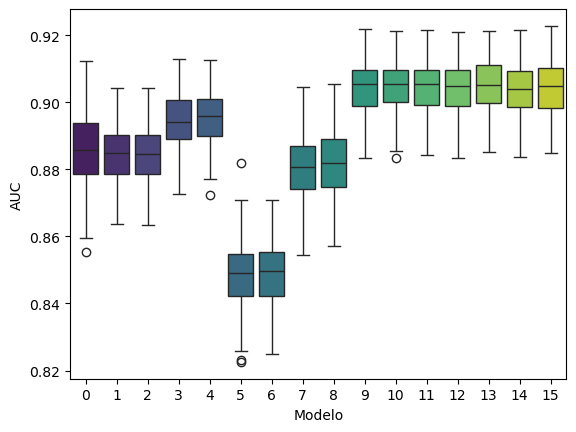

In [194]:
# Transponer dataframe y pasar de wide a long (creando un factor variable con el nombre de cada fórmula de la lista[0,1,2,3])
results = list_res.T.melt()
results.columns = ['Modelo','AUC']
results.head()

# Boxplot paralelo para comparar
plt.clf()
sns.boxplot(x='Modelo',y='AUC',data=results,palette='viridis')
plt.show()

In [ ]:
# El mejor es modelo15

## Punto de corte óptimo para la probabilidad estimada

In [195]:
metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'neg_root_mean_squared_log_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 '

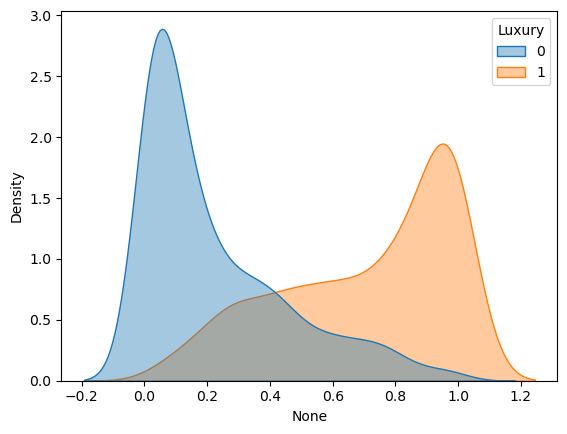

In [196]:
## Buscar el mejor punto de corte

y_pred = modelo15.predict(X_test)

#sns.histplot(x=y_pred, hue=y_test)
#px.histogram(x=y_pred, color=y_test).show()
#gráfico de las probabilidades obtenidas
plt.clf()
sns.kdeplot(x=y_pred, hue=y_test, fill=True, common_norm=False, alpha=0.4)
plt.show()
#hist_targetbinaria(predict(modelo4, newdata=data_test,type="response"),data_test$varObjBin,"probabilidad")

In [197]:
y_pred.describe()

count    1000.000000
mean        0.421678
std         0.345815
min         0.001273
25%         0.090724
50%         0.340969
75%         0.746353
max         0.999999
dtype: float64

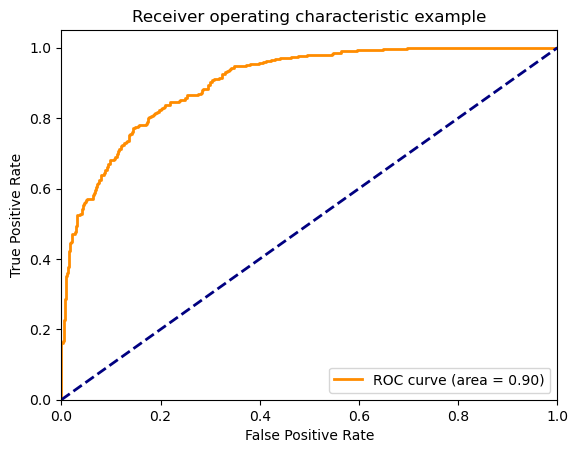

In [198]:
def roc_grafico(test,pred): 
    fpr, tpr, thresholds = metrics.roc_curve(test,pred)
    roc_auc = metrics.auc(fpr, tpr)
    
    plt.figure()
    lw = 2
    plt.plot(
        fpr,
        tpr,
        color="darkorange",
        lw=lw,
        label="ROC curve (area = %0.2f)" % roc_auc,
    )
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()
    
roc_grafico(y_test,y_pred)

In [199]:
# Aplicar corte de youden (NuestrasFunciones), este es el primer punto a probar
corte = cutoff_youden(y_test,y_pred)
corte

0.3882274822249766

In [200]:
# Ver los coeficientes del modelo ganador
modelo15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 4000
Model:                          Logit   Df Residuals:                     3984
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4459
Time:                        20:39:24   Log-Likelihood:                -1511.4
converged:                       True   LL-Null:                       -2727.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -220.8589     56.814     -3.887      0.000    -332.212    -109.506
view[T.1]           1.5789      0.191      8.286      0.000       1.205       1.952
basement[T.1]       0.8315      0.187      4.436      0.000       0.464       1.199
waterfront[T.1]     2.4291      0.907      2.678      0.007       0.652       4.207
year[T.2015]        0.3110      0.098      3.181      0.001       0.119       0.503
floors[T.1.5]       0.4443      0.173      2.563      0.010       0.105       0.784
floors[T.2.0]       0.1590      0.156      1.022      0.307      -0.146       0.464
floors[T.2.5]       1.2484      0.603      2.070      0.038       0.066       2.431
floors[T.3.0]       1.5598      0.298      5.233      0.000       0.976       2.144
lat                 8.0819      0.415     19.453      0.000       7.268       8.896
sqft_living         0.0011      0.000      4.987      0.000       0.001       0.001
sqft_above          0.0016      0.000      6.109      0.000       0.001       0.002
bathrooms           0.3171      0.084      3.790      0.000       0.153       0.481
yr_built           -0.0243      0.003     -9.594      0.000      -0.029      -0.019
log_sqft_lot       -0.1832      0.075     -2.459      0.014      -0.329      -0.037
long                0.9886      0.418      2.364      0.018       0.169       1.808
===================================================================================
"""

## Matrices de confusión

**Matriz de confusión (punto de corte por defecto 0.5)**

In [201]:
y_pred = modelo9.predict(X_test)
round(y_pred)

2706    0.0
2436    0.0
1201    1.0
1486    1.0
4286    1.0
2391    0.0
4911    0.0
3262    0.0
1361    1.0
149     0.0
3123    1.0
2395    0.0
4677    0.0
419     0.0
3496    0.0
3698    0.0
2703    0.0
2582    0.0
2835    0.0
4440    0.0
613     0.0
2240    0.0
2606    0.0
4860    1.0
2361    0.0
142     0.0
2571    0.0
3658    1.0
1664    0.0
3573    0.0
2769    1.0
273     0.0
240     1.0
253     1.0
2932    0.0
4919    1.0
3988    1.0
4835    0.0
2008    1.0
1862    0.0
4942    1.0
2043    0.0
2872    0.0
1547    0.0
1524    1.0
143     1.0
3581    1.0
649     1.0
4243    1.0
3545    0.0
3750    0.0
960     0.0
1333    1.0
337     0.0
4284    1.0
734     0.0
4861    1.0
2875    0.0
4529    1.0
90      1.0
4858    0.0
2400    0.0
4310    1.0
368     1.0
197     1.0
1250    0.0
2056    1.0
2762    0.0
361     0.0
2018    0.0
2616    0.0
1759    0.0
4644    0.0
780     1.0
1016    1.0
1523    1.0
3776    1.0
1854    0.0
4227    0.0
2573    0.0
1924    1.0
2995    1.0
2462    0.0
1111

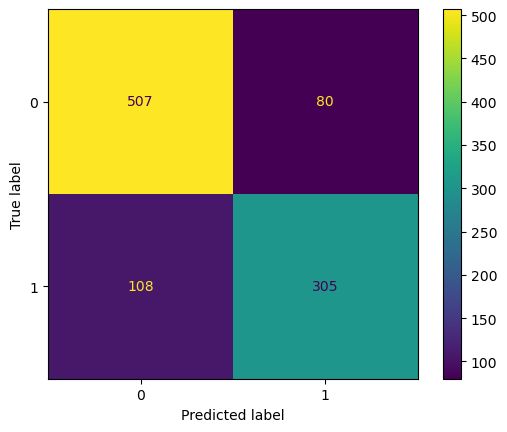

In [203]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelo15.predict(X_test)
cm = confusion_matrix(y_test, round(y_pred))

cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display
plt.show()

In [204]:
# Reporte de clasificación 
print(metrics.classification_report(y_tst,round(y_pred)))

              precision    recall  f1-score   support

         0.0       0.82      0.86      0.84       587
         1.0       0.79      0.74      0.76       413

    accuracy                           0.81      1000
   macro avg       0.81      0.80      0.80      1000
weighted avg       0.81      0.81      0.81      1000



**Matriz de confusión (punto de corte óptimo por Youden)**

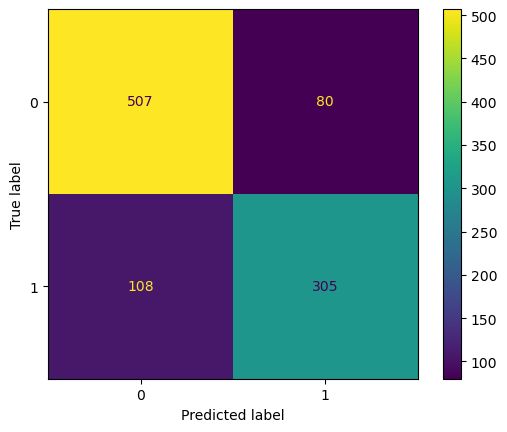

In [205]:
ConfusionMatrixDisplay(cm).plot()

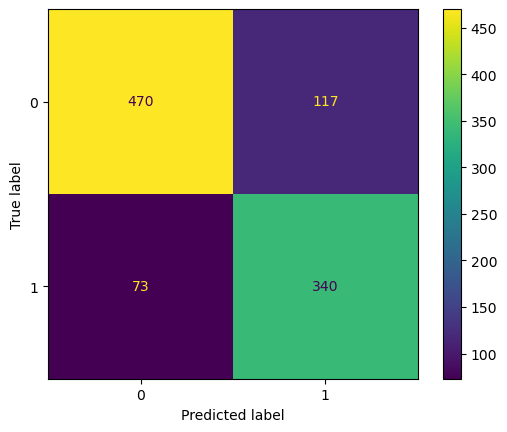

In [207]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = modelo15.predict(X_test)
y_clas =  y_pred.map(lambda x: 1 if x > 0.4 else 0)

cm = confusion_matrix(y_test, y_clas)

cm_display = ConfusionMatrixDisplay(cm).plot()
cm_display
plt.show(cm_display)

In [208]:
# Reporte de clasificación 
print(metrics.classification_report(y_tst,y_clas))

              precision    recall  f1-score   support

         0.0       0.87      0.80      0.83       587
         1.0       0.74      0.82      0.78       413

    accuracy                           0.81      1000
   macro avg       0.80      0.81      0.81      1000
weighted avg       0.82      0.81      0.81      1000



# Interpretación de parámetros del modelo logístico

In [209]:
varObjBin

0       1
1       1
2       1
3       1
4       0
5       0
6       0
7       1
8       0
9       1
10      0
11      0
12      1
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      1
21      0
22      0
23      1
24      1
25      0
26      1
27      0
28      1
29      0
30      1
31      1
32      0
33      0
34      1
35      0
36      1
37      0
38      0
39      0
40      1
41      0
42      1
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      1
51      1
52      0
53      1
54      0
55      0
56      1
57      1
58      1
59      1
60      1
61      0
62      0
63      1
64      0
65      0
66      1
67      1
68      0
69      1
70      0
71      0
72      1
73      0
74      0
75      1
76      1
77      0
78      0
79      1
80      0
81      1
82      0
83      1
84      1
85      0
86      0
87      0
88      0
89      1
90      1
91      1
92      1
93      0
94      1
95      1
96      0
97      1
98      1
99      1


In [210]:
# Ajustar el modelo a datos completos para obtener estimadores más fiables
vinosDep = pd.concat([imputDep,varObjBin.astype('int64')], axis=1)

modeloF = logit(form15,data=vinosDep).fit()
modeloF.summary()

Optimization terminated successfully.
         Current function value: 0.378884
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Luxury   No. Observations:                 5000
Model:                          Logit   Df Residuals:                     4984
Method:                           MLE   Df Model:                           15
Date:                Mon, 09 Dec 2024   Pseudo R-squ.:                  0.4438
Time:                        20:43:00   Log-Likelihood:                -1894.4
converged:                       True   LL-Null:                       -3405.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -281.1178     50.533     -5.563      0.000    -380.160    -182.076
view[T.1]           1.7471      0.172     10.130      0.000       1.409       2.085
basement[T.1]       0.7426      0.167      4.435      0.000       0.414       1.071
waterfront[T.1]     1.9586      0.693      2.828      0.005       0.601       3.316
year[T.2015]        0.3404      0.087      3.895      0.000       0.169       0.512
floors[T.1.5]       0.5007      0.155      3.235      0.001       0.197       0.804
floors[T.2.0]       0.3323      0.139      2.386      0.017       0.059       0.605
floors[T.2.5]       0.8542      0.519      1.644      0.100      -0.164       1.872
floors[T.3.0]       1.4232      0.266      5.345      0.000       0.901       1.945
lat                 8.3262      0.373     22.304      0.000       7.595       9.058
sqft_living         0.0012      0.000      6.022      0.000       0.001       0.002
sqft_above          0.0014      0.000      6.089      0.000       0.001       0.002
bathrooms           0.2742      0.072      3.831      0.000       0.134       0.414
yr_built           -0.0223      0.002    -10.053      0.000      -0.027      -0.018
log_sqft_lot       -0.1657      0.067     -2.483      0.013      -0.296      -0.035
long                0.6236      0.373      1.674      0.094      -0.107       1.354
===================================================================================
"""

In [211]:
# No se pueden interpretar los Betas directamente, por lo que se debe hacer lo siguiente:
np.exp(modeloF.params)

Intercept          8.167473e-123
view[T.1]           5.737921e+00
basement[T.1]       2.101422e+00
waterfront[T.1]     7.089223e+00
year[T.2015]        1.405578e+00
floors[T.1.5]       1.649900e+00
floors[T.2.0]       1.394124e+00
floors[T.2.5]       2.349577e+00
floors[T.3.0]       4.150579e+00
lat                 4.130846e+03
sqft_living         1.001175e+00
sqft_above          1.001410e+00
bathrooms           1.315432e+00
yr_built            9.779562e-01
log_sqft_lot        8.473336e-01
long                1.865587e+00
dtype: float64

Conclusiones del modelo:

* La probabilidad de que una vivienda sea Luxury respecto a que no sea Luxury, de una vivienda con vista es 5,73 veces superior a la de aquellas viviendas sin vista.

* La probabilidad de que una vivienda sea Luxury respecto a que no sea Luxury, de una casa que tiene sotano es 2,1 veces superior a las que no tiene sotano.

* La probabilidad de que una vivienda sea Luxury respecto a que no sea Luxury, de una casa que tiene vista al mar es 7 veces superior a las que no tiene vista al mar.

* Un aumento unitario en la cantidad de baños produce un aumento del ratio de probabilidades de que sea Luxury/no Luxury del 31,5%.

Todos estos efectos se entiende en el contexto ceteris paribus, es decir, todo lo demás constante.